Outlier are the data that are very different from rest of the data. They can reduce accuracy of model.

There are 2 ways to treat outliers:
- z score
- IQR

### Z Score:

In [4]:
a = [50,60,70,80]  

In [22]:
import numpy as np
import seaborn as sns

In [8]:
np.mean(a)

np.float64(65.0)

In [10]:
np.std(a)

np.float64(11.180339887498949)

In [12]:
50 - 65

-15

In [14]:
-15 / 11.180339887498949

-1.3416407864998738

In [16]:
from scipy.stats import zscore

In [18]:
zscore(a)

array([-1.34164079, -0.4472136 ,  0.4472136 ,  1.34164079])

In [26]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Step1: Check Outlier

<Axes: >

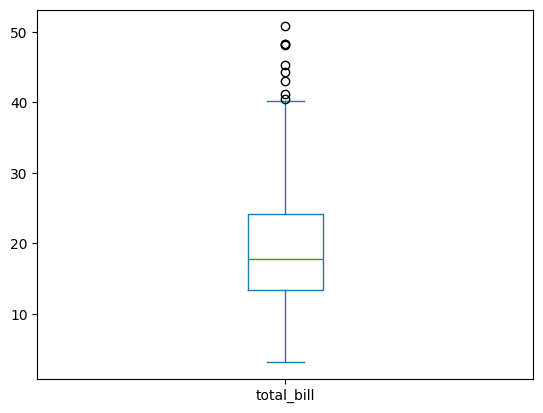

In [29]:
df['total_bill'].plot(kind='box')

### Step 2: Check zscore

In [34]:
df['zscore_total_bill'] = zscore(df['total_bill'])
df

,total_bill,tip,sex,smoker,day,time,size,zscore_total_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1.040511
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.832275
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.324630
242,17.82,1.75,Male,No,Sat,Dinner,2,-0.221287


### Step 3: Condition

In [37]:
df[df['zscore_total_bill']<-3]

,total_bill,tip,sex,smoker,day,time,size,zscore_total_bill


In [39]:
df[df['zscore_total_bill']>3]

,total_bill,tip,sex,smoker,day,time,size,zscore_total_bill
59,48.27,6.73,Male,No,Sat,Dinner,4,3.206166
156,48.17,5.00,Male,No,Sun,Dinner,6,3.194910
170,50.81,10.00,Male,Yes,Sat,Dinner,3,3.492068
212,48.33,9.00,Male,No,Sat,Dinner,4,3.212919


### Step 4: Treat the Outlier

In [50]:
new_data = df[(df['zscore_total_bill']<3)&(df['zscore_total_bill']>-3)]
new_data

,total_bill,tip,sex,smoker,day,time,size,zscore_total_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1.040511
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.832275
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.324630
242,17.82,1.75,Male,No,Sat,Dinner,2,-0.221287


<Axes: >

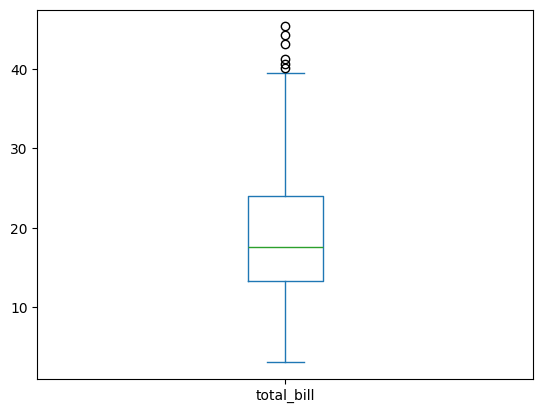

In [52]:
new_data['total_bill'].plot(kind='box')

### IQR

In [60]:
df

,total_bill,tip,sex,smoker,day,time,size,zscore_total_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1.040511
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.832275
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.324630
242,17.82,1.75,Male,No,Sat,Dinner,2,-0.221287


In [58]:
df.describe()

,total_bill,tip,size,zscore_total_bill
count,244.000000,244.000000,244.000000,2.440000e+02
mean,19.785943,2.998279,2.569672,-7.871663e-17
std,8.902412,1.383638,0.951100,1.002056e+00
min,3.070000,1.000000,1.000000,-1.881547e+00
25%,13.347500,2.000000,2.000000,-7.247111e-01
50%,17.795000,2.900000,2.000000,-2.241005e-01
75%,24.127500,3.562500,3.000000,4.886857e-01
max,50.810000,10.000000,6.000000,3.492068e+00


In [62]:
Q1 = df['total_bill'].quantile(0.25)
Q1

np.float64(13.3475)

In [64]:
Q3 = df['total_bill'].quantile(0.75)
Q3

np.float64(24.127499999999998)

In [68]:
IQR = Q3 - Q1
IQR

np.float64(10.779999999999998)

In [70]:
upper_limit = Q3 + 1.5 * IQR
upper_limit

np.float64(40.29749999999999)

In [72]:
lower_limit = Q1 - 1.5 * IQR
lower_limit

np.float64(-2.8224999999999945)

In [74]:
df[df['total_bill']>upper_limit]

,total_bill,tip,sex,smoker,day,time,size,zscore_total_bill
59,48.27,6.73,Male,No,Sat,Dinner,4,3.206166
102,44.30,2.50,Female,Yes,Sat,Dinner,3,2.759302
142,41.19,5.00,Male,No,Thur,Lunch,5,2.409241
156,48.17,5.00,Male,No,Sun,Dinner,6,3.194910
170,50.81,10.00,Male,Yes,Sat,Dinner,3,3.492068
182,45.35,3.50,Male,Yes,Sun,Dinner,3,2.877490
184,40.55,3.00,Male,Yes,Sun,Dinner,2,2.337202
197,43.11,5.00,Female,Yes,Thur,Lunch,4,2.625356
212,48.33,9.00,Male,No,Sat,Dinner,4,3.212919


In [76]:
df[df['total_bill']<lower_limit]

,total_bill,tip,sex,smoker,day,time,size,zscore_total_bill


In [80]:
treat_out = df[(df['total_bill']<upper_limit) & (df['total_bill']>lower_limit)]
treat_out

,total_bill,tip,sex,smoker,day,time,size,zscore_total_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1.040511
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.832275
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.324630
242,17.82,1.75,Male,No,Sat,Dinner,2,-0.221287


<Axes: >

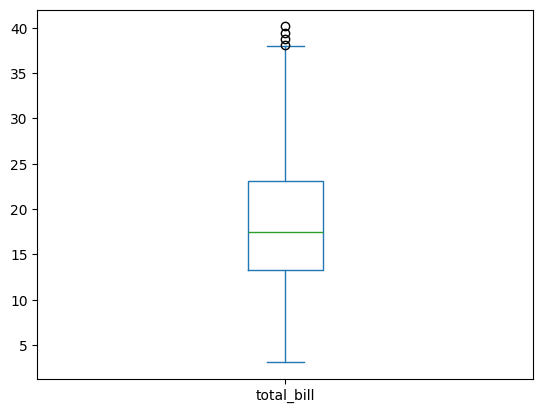

In [82]:
treat_out['total_bill'].plot(kind='box')